# Multinonimial Naive Bayes (MNB) Classifier

Foundations of Data Science, La Sapienza University of Rome, Autum 2024

Group 27

Team Members:
- Oskar Nesheim
- August Nyheim
- Magnus Ouren

In [1]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt



## Constants:

In [2]:
# Constants
DATA_LOCATION = './data'
DATA_FILE = 'movies_balanced.json'
GENRES_FILE = 'popular_genres.json'

## Resources:

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/magnusouren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Data:

In [4]:
# Load dataset
data = pd.read_json(f'{DATA_LOCATION}/{DATA_FILE}')

# load genres
genres = pd.read_json(f'{DATA_LOCATION}/{GENRES_FILE}')
genres = genres.to_numpy().flatten()

## Preprocess Data:

In [5]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)

    # Tokenize text
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join words back to string
    return ' '.join(tokens)

In [6]:
data['overview'] = data['overview'].apply(preprocess_text)


## Split Data:

In [7]:
# Splitting the data into training, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    data['overview'], data['genre'], test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)


## Vectorize Data:

In [8]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=5000, sublinear_tf=True)

X_train_vectors = vectorizer.fit_transform(X_train)
X_val_vectors = vectorizer.transform(X_val)
X_test_vectors = vectorizer.transform(X_test)

## Training

In [ ]:
def tune_and_evaluate(param_grid, X_train_vectors, y_train, X_val_vectors, y_val):
    model = MultinomialNB()
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,  # Cross-validation on training set
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=3,
    )
    grid_search.fit(X_train_vectors, y_train)

    # Get best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Evaluate the model on validation set
    y_val_pred = best_model.predict(X_val_vectors)
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    print(f"Validation F1-score: {f1_val:.3f}")
    print(f"Best parameters: {grid_search.best_params_}")
    return best_model, f1_val

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
best_model, f1_val = tune_and_evaluate(param_grid, X_train_vectors, y_train, X_val_vectors, y_val)

print(classification_report(y_val, best_model.predict(X_val_vectors), target_names=genres))



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .......................alpha=0.001;, score=0.348 total time=   0.0s
[CV 2/5] END .......................alpha=0.001;, score=0.343 total time=   0.0s
[CV 3/5] END .......................alpha=0.001;, score=0.373 total time=   0.0s
[CV 4/5] END .......................alpha=0.001;, score=0.352 total time=   0.0s
[CV 5/5] END .......................alpha=0.001;, score=0.352 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.372 total time=   0.0s
[CV 1/5] END ........................alpha=0.01;, score=0.367 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.387 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.377 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.392 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.401 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;,

## Optimize metrics for Validation Set:

In [28]:
param_grid_updated = {'alpha': [0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4, 1.5]}
best_model_updated, f1_val_updated = tune_and_evaluate(param_grid_updated, X_train_vectors, y_train, X_val_vectors, y_val)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .........................alpha=0.7;, score=0.428 total time=   0.0s
[CV 2/5] END .........................alpha=0.7;, score=0.429 total time=   0.0s
[CV 3/5] END .........................alpha=0.7;, score=0.426 total time=   0.0s
[CV 4/5] END .........................alpha=0.7;, score=0.442 total time=   0.1s
[CV 5/5] END .........................alpha=0.7;, score=0.423 total time=   0.0s
[CV 3/5] END .........................alpha=0.8;, score=0.429 total time=   0.0s
[CV 4/5] END .........................alpha=0.8;, score=0.442 total time=   0.0s
[CV 1/5] END .........................alpha=0.8;, score=0.428 total time=   0.0s
[CV 5/5] END .........................alpha=0.8;, score=0.426 total time=   0.0s
[CV 2/5] END .........................alpha=0.8;, score=0.431 total time=   0.0s
[CV 1/5] END .........................alpha=0.9;, score=0.428 total time=   0.0s
[CV 2/5] END .........................alpha=0.9;,

## Evaluate Model on Test Set:

In [29]:
y_test_pred = best_model_updated.predict(X_test_vectors)

## Print results

In [27]:
print("Best Model:", best_model_updated)
print("Accuracy:", best_model_updated.score(X_test_vectors, y_test))
print(classification_report(y_test, y_test_pred))

Best Model: MultinomialNB(alpha=1.4)
Accuracy: 0.424
              precision    recall  f1-score   support

      Action       0.35      0.40      0.37        96
   Adventure       0.48      0.42      0.45       113
   Animation       0.47      0.51      0.49        78
      Comedy       0.37      0.33      0.35       106
       Crime       0.39      0.44      0.42        99
 Documentary       0.63      0.82      0.72        89
       Drama       0.24      0.18      0.21       100
      Horror       0.54      0.67      0.60       104
     Romance       0.36      0.38      0.37       114
    Thriller       0.27      0.16      0.20       101

    accuracy                           0.42      1000
   macro avg       0.41      0.43      0.42      1000
weighted avg       0.41      0.42      0.41      1000



### Confusion Matrix

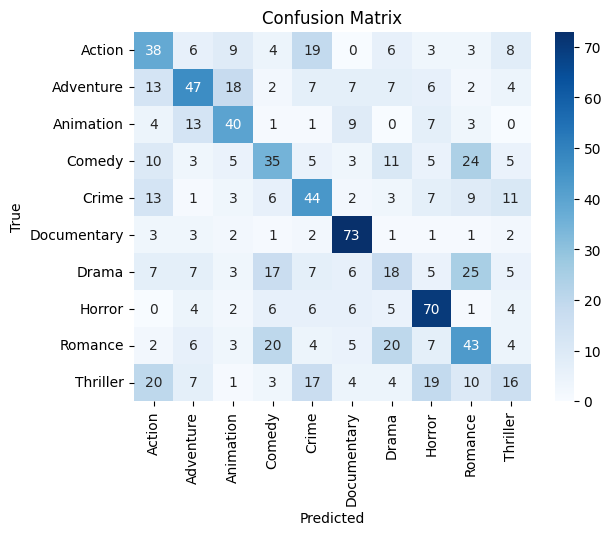

In [14]:
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classification Report Chart

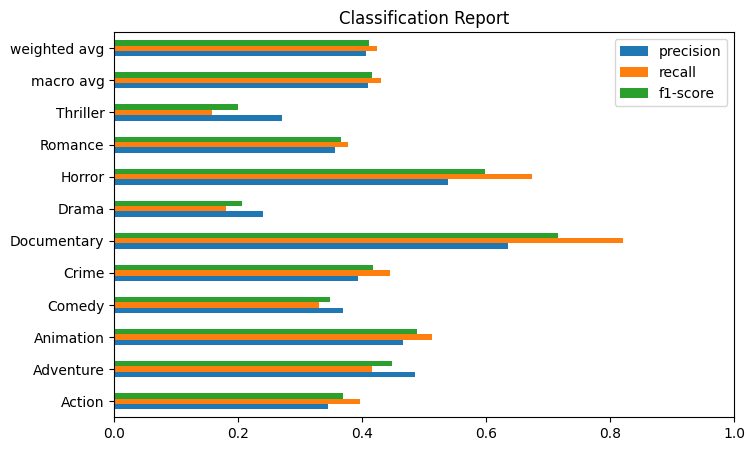

In [15]:
report = pd.DataFrame(classification_report(
    y_test, y_test_pred, output_dict=True)).transpose()
report.drop(['accuracy'], inplace=True)
report['support'] = report['support'].apply(int)
fig, ax = plt.subplots(figsize=(8, 5))
report[['precision', 'recall', 'f1-score']].plot(kind='barh', ax=ax)
ax.set_title('Classification Report')
ax.set_xlim([0, 1])
plt.show()

### Classification Report Table

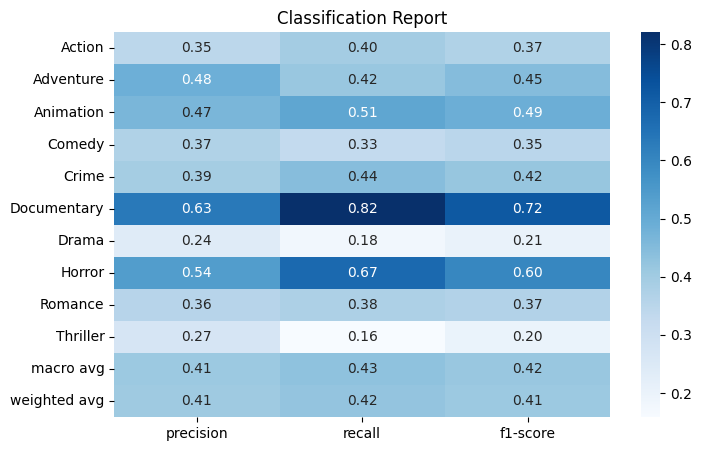

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(report[['precision', 'recall', 'f1-score']], annot=True,
            cmap='Blues', fmt=".2f", ax=ax)
ax.set_title('Classification Report')
plt.show()